<a href="https://colab.research.google.com/github/rkurniawati/ToUCHmodules/blob/master/Fundamentals/elementary_notions/Amdahl's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amdahl's law

# Speed up from parallelism

Assume that you have a program that requires 100 seconds to complete. If you can fully parallelize the program how long does it take to run it on two cores?

In [7]:
# execution time with 2 processors
100/2

50.0

So it will take 50 seconds to run the program on two cores. 

Let's define speed up (S) as: 

   $S = \frac{OldExecutionTime}{NewExecutionTime}$

This result in a speed up of S = (old execution time)/(new execution time) = 100/50 = 2. 

Similarly, if we have 100 cores available, we can run the program in just 1 second (100 seconds/100 cores), resulting in a speed up of 100 (100 second/1 second).


# Speed up from non-fully paralellizable programs

If 10% of the program cannot be parallized and have to run sequentially, how long does it take to run it on 2 cores?

In [ ]:
# execution time for 2 cores when 10% of the program is serial
0.10 * 100 + (1-0.10)*100/2

55.0

So, when 90% of the program can be parallized, the speed up is now only, S = 100/55 = 1.8. When you have 100 processors, what will the speed up be?

In [3]:
# speed up with 2 cores
S2 = 100/55

# execution time from 100 cores, when 10% of the program is serial
E100 = 0.10 * 100 + (1-0.10)*100/100

# speed up with 100 cores
S100 = 100/(0.10 * 100 + (1-0.10)*100/100)

print("S2=", S2, "\nE100=", E100, "\nS100=", S100)

S2= 1.8181818181818181 
E100= 10.9 
S100= 9.174311926605505


As you can see from the calculation above, the speed up is not anywhere near 100x anymore, but it is closer to only 9x. 


# Amdahl's Law

This was observed by Gene Amdahl in the 1960s. He stated that the speed up of a program whose a portion, _p_, of its execution time can be parallized is limited to:

$S = \frac{1}{1-p}$

In our case, _p_ was 0.9 (90%), so our speed up is limited to:

$S = \frac{1}{1-0.9} = \frac{1}{0.1}=10$

Let's do some experiments to see how much speed up we can get with a thousand cores, 1 million cores, and 1 billion cores. 

In [6]:
# execution time with 1 core
E1 = 100

# a thousand cores
E1000 =  0.10 * E1  + (1-0.10)*E1/1000

S1000 = E1/E1000

# a million cores
Emillion =  0.10 * E1  + (1-0.10)*E1/1000000.0

Smillion = E1/Emillion

# a billion cores
Ebillion =  0.10 * E1  + (1-0.10)*E1/1000000000.0

Sbillion = E1/Ebillion

print("S1000=",S1000)
print("Smillion=",Smillion)
print("Sbillion=",Sbillion)


S1000= 9.910802775024777
Smillion= 9.999910000809992
Sbillion= 9.99999991


So, we're getting closer to 10 but not quite. That will only get reached when we have infinite number of processors. 

$E_{\infty} = 0.10 * E1 + \frac{(1-0.10)*E1}{\infty}$

Since anything divided by infinity is zero, we have $E_{\infty} = 10$, resulting in a speed up $S = 10$.

In [ ]:
# infinite cores
Ebillion =  0.10 * E1  + (1-0.10)*E1/1000000000.0

Sbillion = E1/Ebillion

If we graph the speed up $S$ versus the number of processors for different number of processors, you'd get the following graphs, similar to the one in the [Wikipedia](https://en.wikipedia.org/wiki/Amdahl%27s_law).

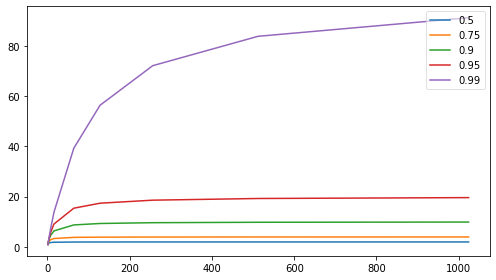

In [19]:
from matplotlib import pyplot as plt 

plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

# x-axis values 
n = [1, 2, 4, 8, 16, 64, 128, 256, 512, 1024] 
  
# Y-axis values is the speed up, calculated using s = 1 / (1-p) + p/n
serialPortion = [.5, .75, .9, .95, .99]

for p in serialPortion:
  y = [] 
  for x in n:
    y.append(1.0/((1.0-p)+p/x))
  
  ax.plot(n, y, label=str(p)) 
  
leg = plt.legend(loc='upper right')
leg.get_frame().set_alpha(0.6)

# function to show the plot 
plt.show()

# Further readings

Note that the discussion above is related to a fixed problem size (this is also called _strong scaling_). In many cases, problem sizes scale with the amount of available resources (_weak scaling_). For this another more optimistic law, called Gustafson's law, is more applicable. 

Here are some references if you'd like to learn more about the topic:

 1. [Amdahl's paper from 1967 AFIPS](https://archive.is/o/xOrx3/www.futurechips.org/wp-content/uploads/2011/06/5_amdahl.pdf).
 2. [Weak Scaling vs Strong Scaling](https://hpc-wiki.info/hpc/Scaling_tutorial#Strong_or_Weak_Scaling). HPC Wiki.